In [340]:
#Template to install a conda package in the current Jupyter kernel - just use conda within happyenv in anaconda prompt
import sys


#Template - install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install numpy

**Set Directory**

In [341]:
%cd C:\Users\noahc\Jupyter\FirstSteps

C:\Users\noahc\Jupyter\FirstSteps


In [342]:
sys.path

['C:\\Users\\noahc',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\python38.zip',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\DLLs',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv',
 '',
 'C:\\Users\\noahc\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\win32',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\Pythonwin']

**Import packages**

In [343]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from featurewiz import featurewiz
from sklearn.model_selection import *

**Import data, perform visual check**

In [344]:
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df.head(4)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5


In [345]:
"""
# creating new feature with X1,X2 both 5
a = (df["X1"]==5)
b=(df["X2"]==5)
df['X1X2'] = a&b
df = df.replace(True, 1)
df = df.replace(False, 0)
"""

'\n# creating new feature with X1,X2 both 5\na = (df["X1"]==5)\nb=(df["X2"]==5)\ndf[\'X1X2\'] = a&b\ndf = df.replace(True, 1)\ndf = df.replace(False, 0)\n'

In [346]:
df.head(40)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


**Remove some outliers**

In [347]:
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

            Y       X1        X2        X3        X4        X5        X6
0    1.100239  1.67332  0.421676  0.303642  0.291150  1.444166  0.315061
1    1.100239  1.67332  0.478852  0.303642  1.437552  0.305497  1.555612
2    0.908893  0.83666  0.421676  0.303642  0.855253  0.569335  0.925491
3    1.100239  0.83666  1.322205  0.303642  0.855253  0.569335  0.925491
4    1.100239  0.83666  1.322205  0.303642  0.855253  0.569335  0.925491
..        ...      ...       ...       ...       ...       ...       ...
121  0.908893  0.83666  0.478852  0.303642  0.291150  0.305497  1.555612
122  0.908893  0.83666  0.478852  0.303642  0.291150  1.444166  0.925491
123  0.908893  0.83666  0.421676  0.303642  0.291150  0.305497  0.925491
124  1.100239  0.41833  0.421676  0.303642  0.291150  0.305497  0.925491
125  1.100239  0.83666  0.421676  1.284640  1.437552  1.180328  0.925491

[126 rows x 7 columns]


In [348]:
threshold = 3
print(np.where(z > 3))

(array([ 34,  47, 119, 119], dtype=int64), array([4, 1, 4, 6], dtype=int64))


In [349]:
dfd = df.drop([34,47,119])

In [350]:
#inputs = dfd.drop('Y', axis='columns')
#target = dfd['Y']

**Assign input and target variables**

In [351]:
inputs = df.drop('Y', axis='columns')
target = df['Y']

**Split the original data**

In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state=0)

**Select features from split data**

In [353]:
#X_selected_train=X_train.drop(columns=['X3','X6'])
#X_selected_test=X_test.drop(columns=['X3','X6'])

In [354]:
"""
X_train=train.drop('Y', axis='columns')
X_test=test.drop('Y', axis='columns')
y_train=train['Y']
y_test=test['Y']
"""

"\nX_train=train.drop('Y', axis='columns')\nX_test=test.drop('Y', axis='columns')\ny_train=train['Y']\ny_test=test['Y']\n"

**Scale all the data**

In [355]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
inputs_sc = sc.fit_transform(inputs)
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [356]:
#Scale all the data
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X1_train2 = sc.fit_transform(X_selected_train)
#X1_test2 = sc.transform(X_selected_test)

**XGBoost Classifier**

In [357]:
from xgboost import XGBClassifier

xg = XGBClassifier(
    max_depth=2,
    gamma=2,
    eta=.8,
    reg_alpha=0.5,
    reg_lambda=0.5
)


In [358]:
xg.fit(X_train_sc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.8,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.800000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.5, ...)

In [359]:
xg.score(X_train_sc, y_train)

0.67

In [360]:
xg.score(X_test_sc, y_test)

0.7307692307692307

In [361]:
xg_pred = xg.predict(inputs_sc)

In [362]:
xg_test_pred = xg.predict(X_test_sc)

In [363]:
xg.score(X_test_sc, y_test)

0.7307692307692307

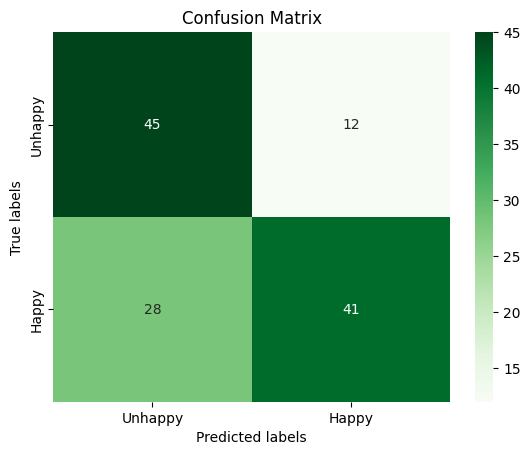

In [364]:
xg_cm = confusion_matrix(target, xg_pred)
ax= plt.subplot()
sns.heatmap(xg_cm, cmap = 'Greens', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Unhappy','Happy']); ax.yaxis.set_ticklabels(['Unhappy', 'Happy']);

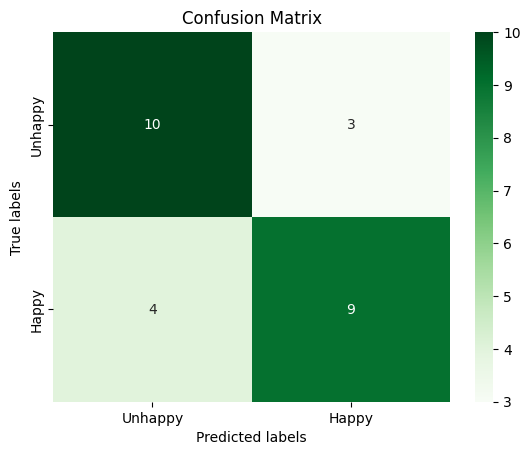

In [365]:
xg_test_cm = confusion_matrix(y_test, xg_test_pred)
ax= plt.subplot()
sns.heatmap(xg_test_cm, cmap = 'Greens', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Unhappy','Happy']); ax.yaxis.set_ticklabels(['Unhappy', 'Happy']);

**SVM Classifier**

In [366]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C=1.00095, gamma = 1e-15 )
svm.fit(X_train_sc, y_train)

SVC(C=1.00095, gamma=1e-15, kernel='linear')

In [367]:
svm.score(X_test_sc, y_test)

0.7692307692307693

In [368]:
svm.score(X_train_sc, y_train)

0.63

In [369]:
svm_pred = svm.predict(inputs_sc)

In [370]:
svm_test_pred = svm.predict(X_test_sc)

In [371]:
svm.predict(X_test_sc)

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1], dtype=int64)

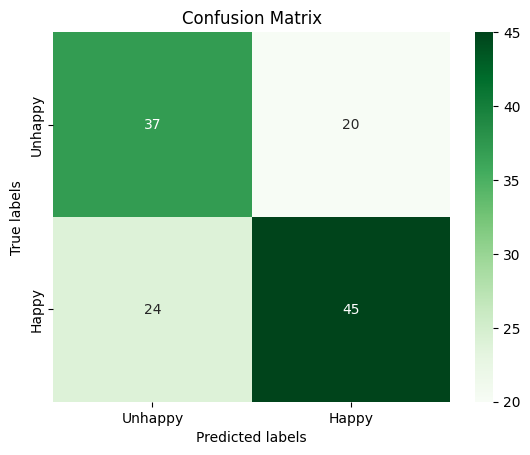

In [372]:
svm_cm = confusion_matrix(target, svm_pred)
ax= plt.subplot()
sns.heatmap(svm_cm, cmap = 'Greens', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Unhappy','Happy']); ax.yaxis.set_ticklabels(['Unhappy', 'Happy']);

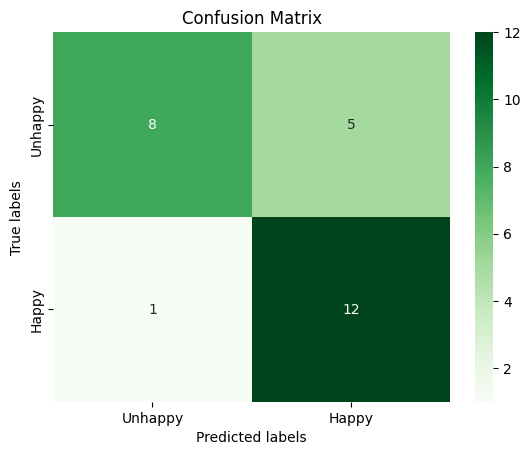

In [373]:
svm_test_cm = confusion_matrix(y_test, svm_test_pred)
ax= plt.subplot()
sns.heatmap(svm_test_cm, cmap = 'Greens', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Unhappy','Happy']); ax.yaxis.set_ticklabels(['Unhappy', 'Happy']);

**End of fitted models**
rest of notebook is scratch

**Poly kernel for SVM (poor performance)**

In [374]:
polysvm= SVC(kernel = 'poly', C=1, gamma=.8, degree = 4)

In [375]:
polysvm.fit(X_train_sc, y_train)

SVC(C=1, degree=4, gamma=0.8, kernel='poly')

In [376]:
polysvm.score(X_test_sc, y_test)

0.5384615384615384

In [377]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(n_jobs=-1, random_state=1)
isf.fit(X_train_sc, y_train)

print(isf.score_samples(X_train_sc))

[-0.6227471  -0.52436568 -0.48857273 -0.45142757 -0.55619936 -0.57813259
 -0.4377679  -0.46122781 -0.5090963  -0.48876593 -0.46155035 -0.52579542
 -0.64477639 -0.55920382 -0.52196217 -0.52392437 -0.4451082  -0.44689731
 -0.40216909 -0.49165814 -0.51005592 -0.4805881  -0.76503846 -0.44181472
 -0.57328612 -0.46293773 -0.4377679  -0.5812898  -0.53493061 -0.52324499
 -0.4778395  -0.41608113 -0.48728672 -0.46155035 -0.47438602 -0.451072
 -0.41827618 -0.49805402 -0.46293773 -0.54631772 -0.41827618 -0.48530151
 -0.45081923 -0.48407908 -0.63674079 -0.51005592 -0.44793447 -0.41426223
 -0.57992677 -0.46756436 -0.45191257 -0.51035527 -0.46890138 -0.50159595
 -0.41958468 -0.48857273 -0.48873355 -0.49661842 -0.40187957 -0.41958468
 -0.51795457 -0.44689731 -0.54372597 -0.41958468 -0.48327042 -0.42507519
 -0.52392437 -0.49677349 -0.44538969 -0.41426223 -0.39914384 -0.43823117
 -0.46275946 -0.55496073 -0.42263833 -0.4551777  -0.40216909 -0.40216909
 -0.45117342 -0.4778879  -0.43660986 -0.42506072 -0.5

In [378]:
outliers=isf.fit_predict(X_train_sc)

In [379]:
mask = outliers != -1

In [380]:
X_train_sc_no_outliers, y_train_no_outliers = X_train_sc[mask, :], y_train[mask]

**XG Without outliers**

In [381]:
xg.fit(X_train_sc_no_outliers, y_train_no_outliers)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.8,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.800000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.5, ...)

In [382]:
xg.score(X_test_sc, y_test)

0.5

In [383]:
"""
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.025,0.05,0.075], #so called `eta` value
              'max_depth': [2,3,4,5,6],
              'min_child_weight': [5,6,7,8,9],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], 
              'missing':[-999],
              'seed': [1337]}

XGB = XGBClassifier(random_state=0)
parameter_grid = {'learning_rate': [0.025,0.05,0.075],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5]}

cross_validation = StratifiedKFold(n_splits=3,random_state=0,shuffle=True)

grid_search_XGB = GridSearchCV(XGB,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                            n_jobs=-1,
                            verbose=0)

grid_search_XGB.fit(X_train_sc, y_train)
print('Best score: {}'.format(grid_search_XGB.best_score_))
print('Best parameters: {}'.format(grid_search_XGB.best_params_))
"""

"\nparameters = {'nthread':[4], #when use hyperthread, xgboost may become slower\n              'objective':['binary:logistic'],\n              'learning_rate': [0.025,0.05,0.075], #so called `eta` value\n              'max_depth': [2,3,4,5,6],\n              'min_child_weight': [5,6,7,8,9],\n              'silent': [1],\n              'subsample': [0.8],\n              'colsample_bytree': [0.7],\n              'n_estimators': [1000], \n              'missing':[-999],\n              'seed': [1337]}\n\nXGB = XGBClassifier(random_state=0)\nparameter_grid = {'learning_rate': [0.025,0.05,0.075],\n        'min_child_weight': [1, 5, 10],\n        'gamma': [0.5, 1, 1.5, 2, 5],\n        'subsample': [0.6, 0.8, 1.0],\n        'colsample_bytree': [0.6, 0.8, 1.0],\n        'max_depth': [2, 3, 4, 5]}\n\ncross_validation = StratifiedKFold(n_splits=3,random_state=0,shuffle=True)\n\ngrid_search_XGB = GridSearchCV(XGB,\n                           param_grid=parameter_grid,\n                           

In [384]:
"""
xg_grid = GridSearchCV(XGBClassifier(), parameters, n_jobs=5, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=2, refit=True)
"""

"\nxg_grid = GridSearchCV(XGBClassifier(), parameters, n_jobs=5, \n                   cv=5, \n                   scoring='accuracy',\n                   verbose=2, refit=True)\n"

In [385]:
#xg_grid.fit(X_train_sc, y_train)

In [386]:
#xg_grid.score(X_test_sc,y_test)

In [387]:
#xg_grid.best_params_

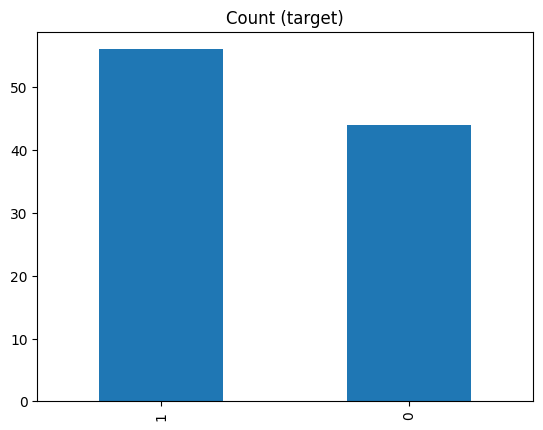

In [388]:
y_train.value_counts().plot(kind='bar', title='Count (target)');

In [390]:
from imblearn.over_sampling import SMOTE



In [531]:
smote = SMOTE(sampling_strategy='minority', n_jobs=-1,random_state=14)
#6

<AxesSubplot: title={'center': 'Count (target)'}>

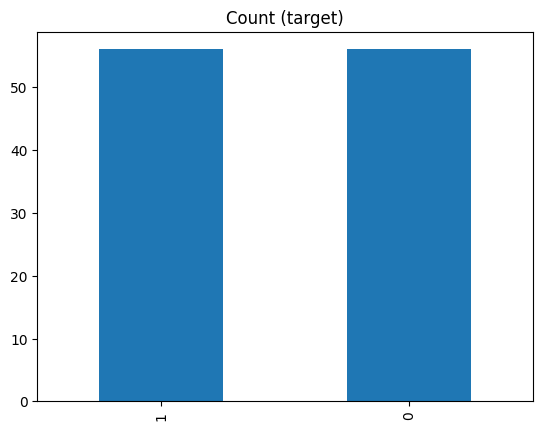

In [532]:
X_sm, y_sm = smote.fit_resample(X_train_sc, y_train)

df01 = pd.DataFrame(X_sm)
df01['target'] = y_sm

df01['target'].value_counts().plot(kind='bar', title='Count (target)')

In [533]:
xg.fit(X_sm,y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.8,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.800000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.5, ...)

In [534]:
xg.score(X_test_sc,y_test)

0.6923076923076923

In [535]:
xg.score(X_sm,y_sm)

0.7142857142857143

In [536]:
svm2 = SVC(kernel = 'linear', C=1)
svm2.fit(X_sm,y_sm)

SVC(C=1, kernel='linear')

In [537]:
svm.score(X_test_sc, y_test)

0.7692307692307693

In [538]:
svm.score(X_sm, y_sm)

0.5982142857142857